In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from collections import OrderedDict
import h5py
import importlib
DataDir = '/nfs/Data/Proteasome Project Data'
import sys
sys.path.append(DataDir)
import MPLGUI as MP
%matplotlib inline

In [2]:
# %run "DataView Current-Dataset Check.py"

In [3]:
1e13/3600/24/365/1000

317.09791983764586

In [4]:
RD = np.load('/nfs/Data/MPLGUI/FigureData/RankData.npy')
RD_SD_Rates = np.load('/nfs/Data/MPLGUI/FigureData/RankData - SynDegRatePoints.npy')
RD_DSG_Rates = np.load('/nfs/Data/MPLGUI/FigureData/RankData-DataSetGrowthRatePoints.npy')
RD_DS = np.load('/nfs/Data/MPLGUI/FigureData/RankData-DataSets.npy')

In [5]:
import os, fnmatch
DataSets = []
listOfFiles = os.listdir(DataDir)  
pattern = "STV3*.py"
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        DataSets.append(entry[:-3])
print (DataSets)


['STV3SynDeg17e-05T', 'STV3SynDeg28e-04T', 'STV3SynDeg10e-09T', 'STV3StaticT', 'STV3SynDeg32e-08T', 'STV3SynDeg10e-16T', 'STV3SynDeg10e-11T', 'STV3SynDeg11e-06T', 'STV3SynDeg27e-07T', 'STV3SynDeg43e-06T', 'STV3SynDeg35e-05T', 'STV3SynDeg10e-10T', 'STV3SynDeg22e-06T', 'STV3SynDeg87e-06T', 'STV3SynDeg10e-14T', 'STV3SynDeg10e-13T', 'STV3SynDeg10e-12T', 'STV3SynDeg54e-07T', 'STV3SynDeg10e-15T', 'STV3SynDeg69e-05T', 'STV3SynDeg56e-04T', 'STV3SynDeg14e-04T']


In [65]:
ShowPlots = True
LineWidth = 2.0
Settings = {"hpad": 0.3, "wpad": 0.3, "FontSize": 11, "ShowNormLine":False}

import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(nrows=3, ncols=2)#, left=0.05, right=0.48, wspace=0.05)

A0 = 4.0e-6
# A0 = 1.0e-8
# Time = 1.0e8
Time = 3600*24 # One Day
# Time = 10**10

In [48]:
def find_nearest(a, a0, return_idx = False):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    if return_idx:
        return idx
    return a.flat[idx]

In [49]:
N = 1
def ChangeDS(NewWorkingName):
    global N
    global WorkingName
    global FullOutArray
    global Errors
    global HasData
    global Runtimes
    global A0Range
    global KD1Range
    global KD2Range
    global Kp
    global TimePoints
    global SpeciesCount
    global Delta
    global Deg
    global Time
    global A0
    global TimeTarget
    global TT
    global A0Target
    
    WorkingName = NewWorkingName
    
    try:
        del FullOutArray
    except:
        pass

    File = h5py.File("{}/{}{}.h5".format(DataDir, N, WorkingName), "r")
    if N == 1:
        CD = importlib.import_module("{}{}".format("",WorkingName))
    else:
        CD = importlib.import_module("{}{}".format(N-1,WorkingName))

    FullOutArray = File["Results"][:]
    FullOutArray = FullOutArray[::-1,::-1,:,:,:]


    Errors = File["Errors"][:]
    HasData = File["HasData"][:]
    Runtimes = File["Runtimes"][:]
    A0Range = File["A0Range"][:]
    Delta = CD.Delta
    Deg = Delta

    KD1Range = File["KD1Range"][:]
    KD1Range = KD1Range[::-1]

    KD2Range = File["KD2Range"][:]
    KD2Range = KD2Range[::-1]

    Kp = File["Kp"][()]
    TimePoints = CD.KeepTimePoints
    SpeciesCount = CD.SpeciesCount
    
    TimeTarget = find_nearest(TimePoints, Time, return_idx=True)
    TT = TimeTarget
    A0Target = find_nearest(A0Range, A0, return_idx=True)
    A0 = A0Range[A0Target]
    Time = TimePoints[TimeTarget]

    print "Working Name: {}".format(WorkingName)
    print "Shape: {}".format(Errors.shape)
    print "Errors: {}".format(np.sum(Errors==True))
    print "HasData: {}".format(np.sum(HasData==True))
    print "Time at TimePoint: {}".format(Time)
    print "Conc at A0Point: {}".format(A0)

In [66]:
ChangeDS("STV3StaticT")
print FullOutArray[50,50,1,-1,-1]

Working Name: STV3StaticT
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 10000000000.0
Conc at A0Point: 4e-06
0.543591175712


In [67]:
len(TimePoints)

112

In [68]:
# Setup Initial Derived Values
TimeTarget = np.argmax(TimePoints==find_nearest(TimePoints, Time))
TT = TimeTarget
A0Target = np.argmax(A0Range==find_nearest(A0Range, A0))
A0 = A0Range[A0Target]
Time = TimePoints[TimeTarget]
print Time
print A0

# # A0 = 1.0e-8
# # Time = 1.0e8
# Time = 3600*24 # One Day

# TT = np.argmax(TimePoints > 1.00000000e+12)
# TT = len(TimePoints)-1
# print ("{} : {:.2e}".format(TT, TimePoints[TT]))

10000000000.0
4e-06


In [69]:
# FullOutArray[KD1,KD2,A0Target,TimeTarget,Species]
Species = 11
DS = OrderedDict()
for C_DS in DataSets:
    ChangeDS(C_DS)
    Data = FullOutArray[:,:,1,TT,Species]
    try:
        DS[1.0/Delta] = Data
    except:
        DS[1e17] = Data

Working Name: STV3SynDeg17e-05T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 10000000000.0
Conc at A0Point: 4e-06
Working Name: STV3SynDeg28e-04T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 10000000000.0
Conc at A0Point: 4e-06
Working Name: STV3SynDeg10e-09T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 10000000000.0
Conc at A0Point: 4e-06
Working Name: STV3StaticT
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 10000000000.0
Conc at A0Point: 4e-06
Working Name: STV3SynDeg32e-08T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 10000000000.0
Conc at A0Point: 4e-06
Working Name: STV3SynDeg10e-16T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 10000000000.0
Conc at A0Point: 4e-06
Working Name: STV3SynDeg10e-11T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 10000000000.0
Conc at A0Point: 4e-06
Working Name: STV3SynDeg11e-06T
Shape: (100, 100)
Errors: 0
HasData:

In [70]:
DSS = OrderedDict()
DSS_Flat = OrderedDict()
for C_DS in sorted(DS.keys()):
    DSS[C_DS] = DS[C_DS]
    DSS_Flat[C_DS] = DS[C_DS].reshape(10000)

In [71]:
from scipy.stats import rankdata

In [72]:
print(np.where(DSS.values()[0][-1,-1] == DSS.values()[0].reshape(10000)))
print(np.where(DSS.values()[0][0,-1] == DSS.values()[0].reshape(10000)))
print(np.where(DSS.values()[0][-1,0] == DSS.values()[0].reshape(10000)))
print(np.where(DSS.values()[0][0,0] == DSS.values()[0].reshape(10000)))
print(np.where(DSS.values()[0][55,55] == DSS.values()[0].reshape(10000)))
DS_Ranked = OrderedDict()
for C_DS in DSS.keys():
    DS_Ranked[C_DS] = rankdata(DSS[C_DS], method='ordinal')

(array([9999]),)
(array([99]),)
(array([9900]),)
(array([0]),)
(array([5555]),)


In [73]:
%%time 
# Figure Settings
Species=11
ImgFileName = "Static_FracPlot_Species_{}.pdf".format(Species)
Title       = "Static : Species {}".format(Species)
XAxisLabel  = 'Time (s)'

ChangeDS("STV3StaticT")
# Static = FullOutArray[:,:,1,:,Species]
# YAxisLabel  = 'Assembly Efficiency Rank'
# YAxisLabel  = 'Species Yield'
# MainPlot.YLabel("Yield of Maximal Structure")
# XAxisPoints = TimePoints
# XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]

# StaticFlat = np.array([Static[:,:,i].reshape(10000) for i in range(len(TimePoints))])

ColorList = {
    "SW":"#e41a1c",
    "WW":"#377eb8",
    "SS":"#4daf4a",
    "WS":"#984ea3",
    "M":"#ff7f00",
}
DataIndicies = {
    "SW":9900,
    "WW":9999,
    "SS":0,
    "WS":99,
    "M":5555,
}
DataLocations = {
    "SW":(np.min(KD1Range), np.max(KD2Range)),
    "WW":(np.max(KD1Range), np.max(KD2Range)),
    "SS":(np.min(KD1Range), np.min(KD2Range)),
    "WS":(np.max(KD1Range), np.min(KD2Range)),
    "M":(KD1Range[55], KD2Range[55]),
}
DataIndices = {
    "SW":(-1, 0),
    "WW":(-1, -1),
    "SS":(0, 0),
    "WS":(0, -1),
    "M":(55, 55),
}

DataNames = {x:map("{:.0e}".format,y) for (x,y) in DataLocations.items()}

Working Name: STV3StaticT
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 10000000000.0
Conc at A0Point: 4e-06
CPU times: user 78.5 ms, sys: 196 ms, total: 275 ms
Wall time: 282 ms


In [58]:
A0Range

array([  2.00000000e-06,   4.00000000e-06])

def AddContour(
                MainPlot,
                PlotIndex,
                DataSet,
                Width = MP.inches2mm(3.25),
                FontSize = 5.5,
                Aspect=1.0,
                hpad=0.3,
                wpad=0.3,
                axes_aspect="equal",
                ShiftRight = 0.0,
                ColorMarkers = True,
                *args,
                **kwargs
            ):

In [62]:
# from MPLGUI import ContourPlot
import MPLGUI as MP

__author__ = 'Koan'

def AddContour(
                MainPlot,
                PlotIndex,
                DataSet,
                Width = MP.inches2mm(3.25),
                FontSize = 5.5,
                Aspect=1.0,
                hpad=0.3,
                wpad=0.3,
                axes_aspect="equal",
                ShiftRight = 0.0,
                ColorMarkers = False,
                *args,
                **kwargs
            ):
    import numpy as np
    import MPLGUI as MP
    from matplotlib.offsetbox import AnnotationBbox, OffsetImage

    Images = MP.ImportImages()

    IP = False
    InVivo = False
    ContourData = FullOutArray[:,:,A0Target,TimeTarget,11].T

#     KD1Range = np.load("{}/{}".format(MP.DefaultDataDir, "KDRange.npy"))
#     KD2Range = np.load("{}/{}".format(MP.DefaultDataDir, "KDRange.npy"))

    XLim = [np.max(KD1Range),np.min(KD1Range)]
    YLim = [np.max(KD2Range),np.min(KD2Range)]

    XBounds = (XLim[0] <= KD1Range) & (KD1Range<= XLim[1])
    XBounds = (YLim[0] <= KD2Range) & (KD2Range<= YLim[1])

    if MainPlot:
        MF = MainPlot._MainFig
    else:
        MF = MainPlot

    MainPlot = MP.ContourPlot(
        Width=Width,
        PrimaryFig=MF,
        subplot=PlotIndex,
        Aspect=Aspect,
        hpad = hpad,
        wpad = wpad,
        axes_aspect=axes_aspect,
    )
    """
    gs = gridspec.GridSpec(3,2)
    global T1
    T1 = gs
    global T2
    ll,bb,ww,hh = gs.get_position().bounds
    CB.ax.set_position([ll, bb, ww, hh])
#     MainPlot._Plot.set_position(gs[0:2].get_position(MainPlot._MainFig))
#     MainPlot._Plot.set_subplotspec(gs[0:2]) 
    """

    XTicks = MainPlot._Plot.xaxis.get_major_ticks()
    YTicks = MainPlot._Plot.yaxis.get_major_ticks()
    for Index in np.arange(0, len(XTicks),2):
        XTicks[Index].label1On = ""
        YTicks[Index].label1On = ""

    import matplotlib.cm as cm
    
#     ColorMap = cm.gray_r
#     ColorMap = cm.gray
    ColorMap = cm.binary
#     ColorMap = cm.plasma_r
    
    ContourImage = MainPlot._Plot.pcolormesh(
        KD1Range,
        KD2Range,
        ContourData,
        cmap=ColorMap,
        shading="gouraud"
        # vmin=0.0,
        # vmax=1.0,
    )
    ContourImage.autoscale()
    ZLim = [np.min(ContourData), np.max(ContourData)]
#         ZLim = [0.0,1.0]
    Delta = ZLim[1] - ZLim[0]
    ContourLevels = [
            ZLim[0]+1.0*Delta/5.0,
            ZLim[0]+2.0*Delta/5.0,
            ZLim[0]+3.0*Delta/5.0,
            ZLim[0]+4.0*Delta/5.0,
    ]
    if DataSet == "in vivo-like":
        ContourLevels = [
                ZLim[0]+1.0*Delta/5.0,
                ZLim[0]+2.0*Delta/5.0,
                ZLim[0]+3.0*Delta/5.0,
                ZLim[0]+4.0*Delta/5.0,
                0.97,
                0.975,
                0.98
                ]

#         if DataSet == "In Vivo":
#             ContourLevels = [
#                     ZLim[0]+1.0*Delta/5.0,
#                     ZLim[0]+2.0*Delta/5.0,
#                     ZLim[0]+3.0*Delta/5.0,
#                     ZLim[0]+4.0*Delta/5.0,
#                     ]
# #             ContourLevels = [
# #                     0.40,
# #                     0.60,
# #                     0.63,
# #                     0.65,
# #                     ]
#         elif DataSet == "In Vitro":
#             ContourLevels = [
#                     0.50,
#                     0.59,
#                     0.75,
#                     0.99,
#                     ]
    print ZLim
    print ContourLevels
    CLs = MainPlot._Plot.contour(
        KD1Range,
        KD2Range,
        ContourData,
        ContourLevels,
        origin='lower',
        linewidths=2.0,
        colors=(
            'red',
            'blue',
            'green',
            'purple',
        )
    )
    if ContourLevels[-1] > 0.95:
        ContourLevels = ContourLevels[:-1]
    Colorbar = MP.mpl.colorbar(
            ContourImage,
            #     ticklocation = [],
            ticks = [ZLim[0],ZLim[1]]+ContourLevels,
            format = '%1.3f',
#                 format = '%3d%%',
            drawedges = False,
            orientation = 'vertical',
            #     shrink=0.8,
            #     extend='neither'
#                 shrink=0.8
        )

    MainPlot._Plot.tick_params(
            which = 'major',
            labelsize=FontSize*0.8,
            pad = 1.5, # How far are the labels from the mark
    )
    Colorbar.ax.tick_params(which='both',length=0, labelsize=FontSize*0.8)
    # Colorbar.ax.set_xticks([ZLim[0],ZLim[1]]+ContourLevels)
    Colorbar.add_lines(CLs)
    # Colorbar.set_ticks(ContourLevels)
    Colorbar.update_ticks()

#         MainPlot._Plot.clabel(
#             ContourLines,
#             ContourLevels,
#             inline=1,
#             fmt='%.2f',
#             fontsize=7,
#             orientation='vertical',
#             inline_spacing = 30.0,
#         )

#     MainPlot.SaveFig(ImgFileName, bbox_inches = 'tight')
    if ColorMarkers:
        MarkerSize = 10
        for Key in DataLocations.keys():
            CMS = MarkerSize
            if DataLocations[Key][1] < 9e-11 or DataLocations[Key][1] > 9e-4 or DataLocations[Key][0] < 9e-11 or DataLocations[Key][0] > 9e-4:
                CMS = 30
            MainPlot._Plot.loglog(
                DataLocations[Key][1],DataLocations[Key][0],
                marker="o",
                markersize = CMS,
                color=ColorList[Key],
            )

    MainPlot.XLabel(r"Intra-Ring K$_d$ (M)")
    MainPlot.YLabel(r"Inter-Ring K$_d$ (M)")
    MainPlot.SetXRange(XLim[0],XLim[1])
    MainPlot.SetYRange(YLim[0],YLim[1])

#         MainPlot.SaveFig(ImgFileName, bbox_inches = 'tight', antialiased=True)
#         MP.OpenPDF(ImgFileName)
#     l,b,w,h = MainPlot.gca().get_position().bounds

#     print plt.gca().get_position().bounds
# #         ll,bb,ww,hh = Colorbar.ax.get_position().bounds
#     print Colorbar.ax.get_position().bounds
# #         Colorbar.ax.set_position([ll, b+0.1*h, ww, h*0.8])
    Colorbar.ax.set_position(np.array(Colorbar.ax.get_position().bounds) + [ShiftRight,0.0,0,0])
    MainPlot._Plot.set_position(np.array(MainPlot._Plot.get_position().bounds) + [ShiftRight,0.0,0,0])

    MainPlot._Plot.set_title(DataSet, style='italic')

    print "Done"
    return MainPlot

def MakeRankPlot(
    MainPlot,
    PlotIndex,
    Width = MP.inches2mm(3.25),
    FontSize = 5.5,
    Aspect= 4.0/3.0,
    hpad=0.2,
    wpad=0.40,
    ShiftRight = 0.0,
    Species = 11,
    Title = "",
    Type = "Conc", # "Conc" or "Time"
    RankOrValue = "Value", # "Rank" or "Value"
    *args,
    **kwargs
    ):

In [63]:
def MakeRankPlot(
    MainPlot,
    PlotIndex,
    Width = MP.inches2mm(3.25),
    FontSize = 5.5,
    Aspect= 4.0/3.0,
    hpad=0.2,
    wpad=0.40,
    ShiftRight = 0.0,
    Species = 11,
    Title = False,
    Type = "Conc", # "Conc" or "Time"
#     Class = "Species", # "Species" or "Asm"
    RankOrValue = "Value", # "Rank" or "Value"
    VMarkLine = True,
    *args,
    **kwargs
    ):
    
#     MainPlot = MP.LinePlot(
#         Width="double",
#         YAxisInPercent = False
#         );
#     if MainPlot:
#         MF = MainPlot._MainFig
#     else:
#         MF = MainPlot
    if Type == "Conc":
        XAxisLabel = "Initial Monomer Concentration (M)"
        global TimeTarget
        global A0
        V = TimePoints[TimeTarget]
        H = A0
        VU = "(s)"
        if RankOrValue == "Rank":
            StaticFlat = np.array([rankdata(FullOutArray[:,:,i,TimeTarget,Species], method='ordinal') for i in range(len(A0Range))])
        elif RankOrValue == "Value":
            StaticFlat = np.array([FullOutArray[:,:,i,TimeTarget,Species].reshape(10000) for i in range(len(A0Range))])
        XAxis = A0Range

    elif Type == "Time":
        XAxisLabel = "Time (s)"
        global Time
        global A0Target
        V = A0Range[A0Target]
        H = Time
        VU = "(M)"
        StaticFlat = np.array([FullOutArray[:,:,A0Target,i,Species].reshape(10000) for i in range(len(TimePoints))])
        if RankOrValue == "Rank":
            StaticFlat = np.array([rankdata(FullOutArray[:,:,A0Target,i,Species], method='ordinal') for i in range(len(TimePoints))])
        elif RankOrValue == "Value":
            StaticFlat = np.array([FullOutArray[:,:,A0Target,i,Species].reshape(10000) for i in range(len(TimePoints))])
        XAxis = TimePoints
        
    YMax = np.max(StaticFlat)
    YMin = np.min(StaticFlat)

    def AddLineToPlot(DataSetCode, MainPlot):
        if DataSetCode:
            Indcies = [DataIndicies[DataSetCode]]
            Order = 1
            CColor = ColorList[DataSetCode]
            CAlpha = 1.0
            CLineWidth = LineWidth
        else:
            Indcies = range(0,len(StaticFlat[0,:]),8)
#             Indcies = range(0,len(StaticFlat[0,:]))
            Order = 0
            CColor = "grey"
            CAlpha = 0.1
            CLineWidth = LineWidth*0.1
            DataSetCode = None
            
            
        for i in Indcies:
            MainPlot.AddLine(
                XAxis,
                StaticFlat[:,i],
        #         label="SS",
                color=CColor,
            #     clip_on=True,
                alpha=CAlpha,
            #     marker = "o",
                zorder=Order,
                linewidth=LineWidth,
                label=DataSetCode,
                )
        return MainPlot
    
    if MainPlot:
        MF = MainPlot._MainFig
    else:
        MF = MainPlot
    MainPlot = MP.LinePlot(
        YAxisInPercent = False,
        Width=Width,
        PrimaryFig=MF,
        subplot=PlotIndex,
        Aspect=Aspect,
        hpad = hpad,
        wpad = wpad,
        FontSize = FontSize,
        OF = True,
    #         axes_aspect=axes_aspect,
    )

    AddLineToPlot(False, MainPlot)
    for Key in DataIndicies.keys():
        MainPlot = AddLineToPlot(Key, MainPlot)

#     LegendAdjust = (15.0, -10.0)
#     MainPlot.AddLegend(
#         loc = "best",
#     #     loc = "lower right",
#     #     loc = "upper right",
#         labelspacing = 0.5
#         )
    
    MainPlot.SetXRange(np.min(XAxis),np.max(XAxis))

    MainPlot.SetYRange(YMin, YMax*1.02)
    if VMarkLine:
        MainPlot._Plot.axvline(
            H,
            color="grey",
            zorder=0.0,
            linewidth=LineWidth,
            alpha = 1.0,
            linestyle = "--",
        )

        
    # MainPlot.SetYRange(0.0, 1.05)

    MainPlot.XLabel(XAxisLabel)
    MainPlot.YLabel("Yield of Maximal Structure")
    XTicks = MainPlot._Plot.xaxis.get_major_ticks()
    for Index in np.arange(0, len(XTicks),2):
        XTicks[Index].label1On = ""

    if Title:
        MainPlot._Plot.set_title("{} - {} - {:.0e} {}".format(RankOrValue, Title, V, VU))
    # MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
    # MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))
    return MainPlot

Working Name: STV2StaticT
Shape: (100, 100)
Errors: 7
HasData: 1344000000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4.32876128108e-06
[0.22007612679324837, 0.99994085109669639]
[0.37604907165393797, 0.53202201651462755, 0.68799496137531713, 0.84396790623600682]
Done
Working Name: STV2SynDeg28e-04T
Shape: (100, 100)
Errors: 0
HasData: 1344000000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4.32876128108e-06
[0.86889434341331251, 0.98121877345141395]
[0.89135922942093282, 0.91382411542855313, 0.93628900143617333, 0.95875388744379364, 0.97, 0.975, 0.98]
Done
CPU times: user 42.5 s, sys: 25.6 s, total: 1min 8s
Wall time: 4min 32s


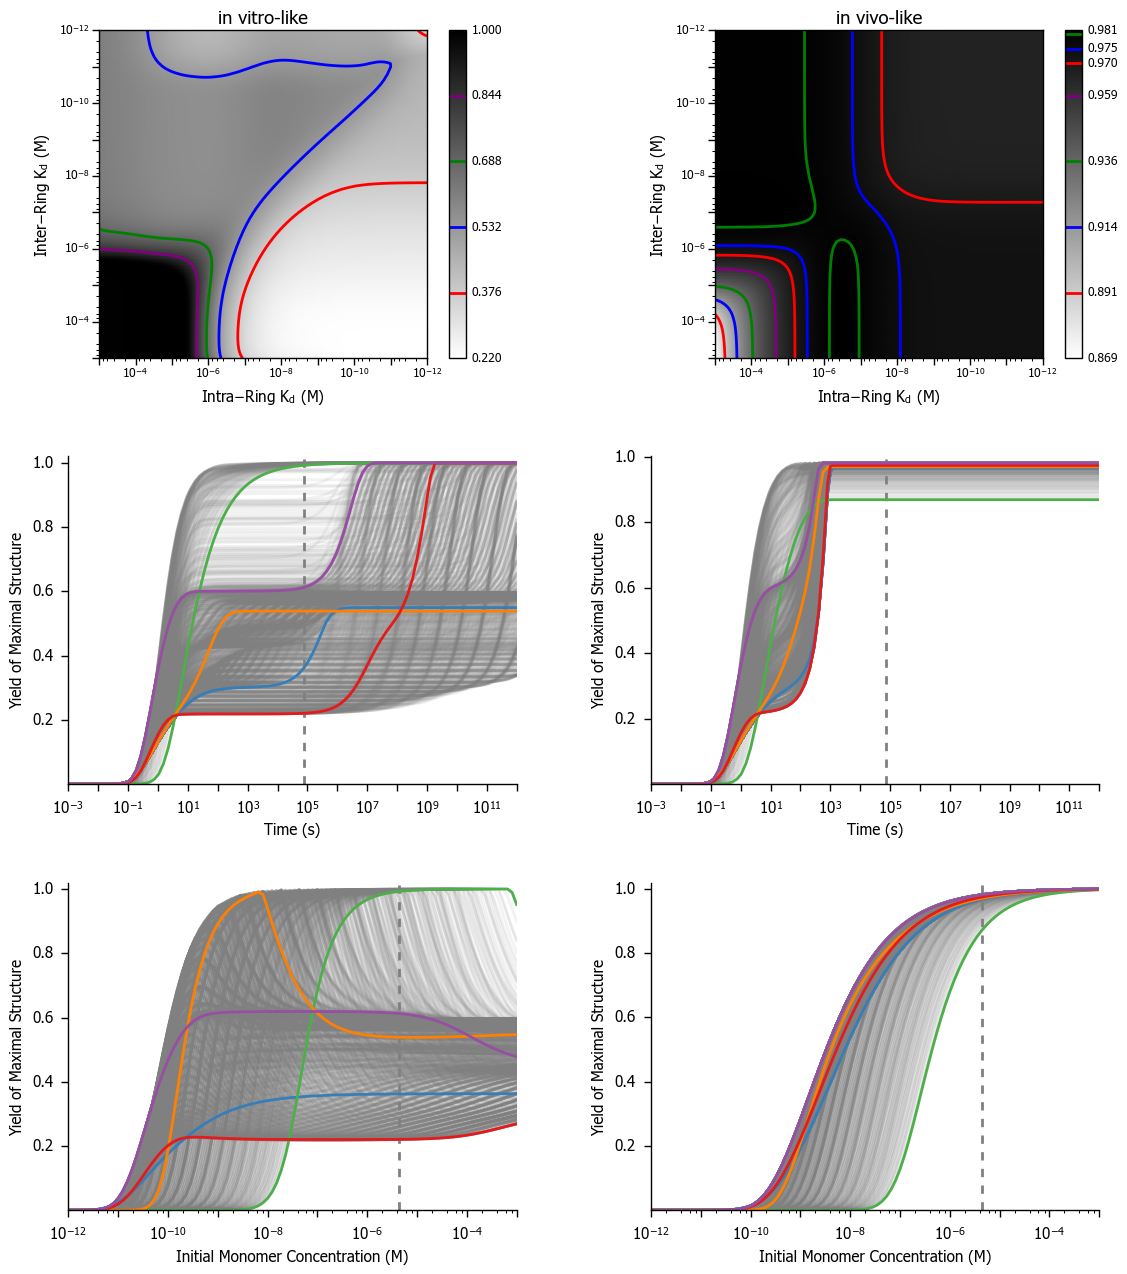

In [64]:
%%time

OverallMainPlot = MP.MPLGPU(
    Blank=True,
#     hpad=0.1,
#     wpad=0.1,
#     FontSize = FontSize,
    Width=MP.inches2mm(6.5),
    subplot=321,
#     axes_aspect="equal",
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)
gs1 = gridspec.GridSpec(nrows=3, ncols=2)#, left=0.05, right=0.48, wspace=0.05)

DSName = "STV2StaticT"
ChangeDS(DSName)
if "Static" in DSName:
    CDataSet = "in vitro-like"
else:
    CDataSet = "in vivo-like"
MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,0], Type="Time", RankOrValue="Value", VMarkLine=True, **Settings)
MainPlot = MakeRankPlot(OverallMainPlot, gs1[2,0], Type="Conc", RankOrValue="Value", VMarkLine=True, **Settings)
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,0], Type="Time", RankOrValue="Rank", Title = CDataSet, **Settings)
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,1], Type="Conc", RankOrValue="Rank", Title = CDataSet, **Settings)
CP = AddContour(
    OverallMainPlot,
    gs1[0,0],
    CDataSet,
    Width = MP.inches2mm(3.5),
    Aspect=1.0,
    axes_aspect="equal",
    ShiftRight = 0.025,
#     ColorMarkers = False,
    **Settings
    )

DSName = "STV2SynDeg28e-04T"
ChangeDS(DSName)
if "Static" in DSName:
    CDataSet = "in vitro-like"
else:
    CDataSet = "in vivo-like"
MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,1], Type="Time", RankOrValue="Value", VMarkLine=True, **Settings)
MainPlot = MakeRankPlot(OverallMainPlot, gs1[2,1], Type="Conc", RankOrValue="Value", VMarkLine=True, **Settings)
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[3,0], Type="Time", RankOrValue="Rank", Title = CDataSet, **Settings)
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[3,1], Type="Conc", RankOrValue="Rank", Title = CDataSet, **Settings)
CP = AddContour(
    OverallMainPlot,
    gs1[0,1],
    CDataSet,
    Width = MP.inches2mm(3.5),
    Aspect=1.0,
    axes_aspect="equal",
    ShiftRight = 0.025,
#     ColorMarkers = False,
    **Settings
    )


MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

In [74]:
# Figure Settings
ImgFileName = "RankFracPlot_TP_{:.2e}_{}.pdf".format(TimePoints[TT], Species)
Title       = "Time Point {:.2e} (s) Species {}".format(TimePoints[TT], Species)
XAxisLabel  = 'Cell Division Period (s)'
# YAxisLabel  = 'Assembly Efficiency Rank'
YAxisLabel  = 'Species Yield'
XAxisPoints = [x for x in DS_Ranked.keys()]
XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]

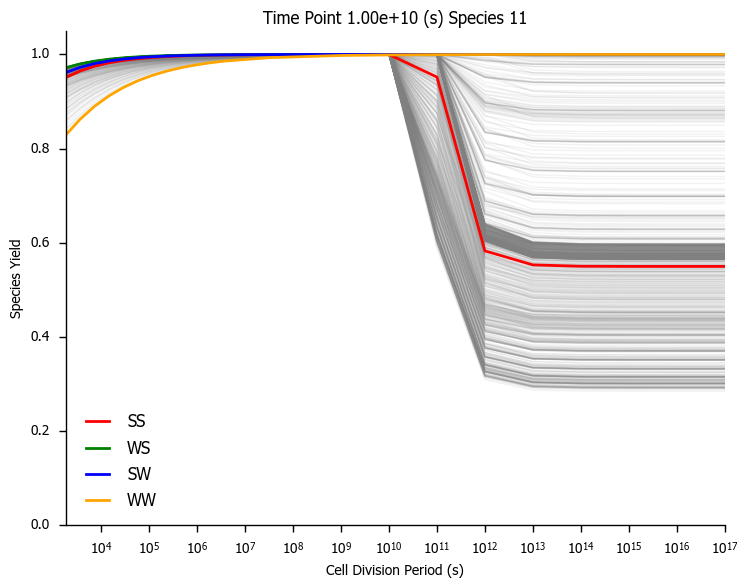

In [75]:
LineWidth = 2.0
MainPlot = MP.LinePlot(
    Width="double",
    YAxisInPercent = False
    );

for i in range(0,len(DS_Ranked.values()[0]),8):
    MainPlot.AddLine(
        XAxisPoints,
        [x[i] for x in DSS_Flat.values()],
#         label="SS",
        color="grey",
    #     clip_on=True,
        alpha=0.1,
    #     marker = "o",
        zorder=0
        )

MainPlot.AddLine(
    XAxisPoints,
    [x[9999] for x in DSS_Flat.values()],
    label="SS",
    color="red",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[99] for x in DSS_Flat.values()],
    label="WS",
    color="green",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[9900] for x in DSS_Flat.values()],
    label="SW",
    color="blue",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[0] for x in DSS_Flat.values()],
    label="WW",
    color="orange",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_B[XBounds]/B0,
#     label="B",
#     color="Blue",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=1
#     )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_AB[XBounds]/np.min([A0,B0]),
#     label="AB",
#     color="Green",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=0
#     )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])

MainPlot.SetYRange(0.0,1.05)

# MainPlot.SetYRange(0.0, 1.05)

MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)
MainPlot._Plot.set_title(Title)
# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

In [46]:
print "{:.2f} Days".format(TimePoints[TT]/60/24)
print "{:.2f} Years".format(TimePoints[TT]/60/24/365)

69.44 Days
0.19 Years


In [30]:
# Figure Settings
ImgFileName = "RankPlot_TP_{:.2e}_{}.pdf".format(TimePoints[TT], Species)
Title       = "Time Point {:.2e} (s) {}".format(TimePoints[TT], Species)
XAxisLabel  = 'Cell Division Period (s)'
YAxisLabel  = 'Assembly Efficiency Rank'
# YAxisLabel  = 'Species Yield'
XAxisPoints = [x for x in DS_Ranked.keys()]
XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]

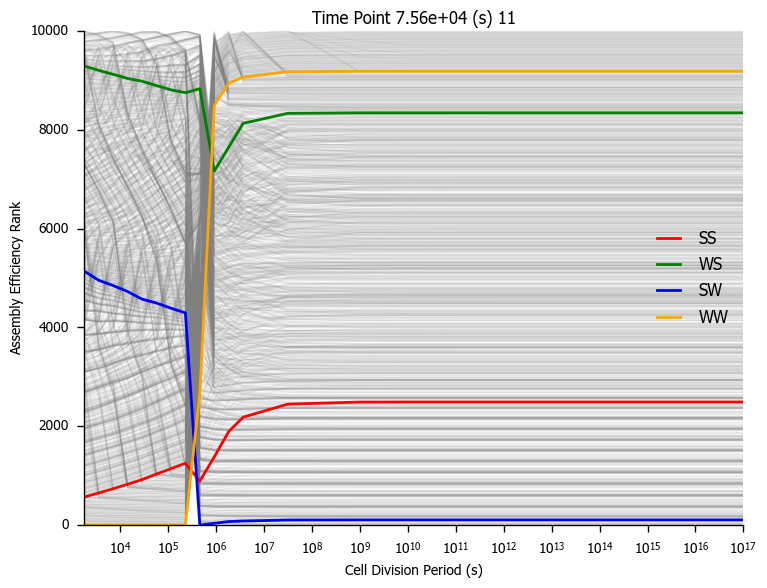

In [31]:
LineWidth = 2.0
MainPlot = MP.LinePlot(
    Width="double",
    YAxisInPercent = False
    );

for i in range(0,len(DS_Ranked.values()[0]),8):
    MainPlot.AddLine(
        XAxisPoints,
        [x[i] for x in DS_Ranked.values()],
#         label="SS",
        color="grey",
    #     clip_on=True,
        alpha=0.1,
    #     marker = "o",
        zorder=0
        )

MainPlot.AddLine(
    XAxisPoints,
    [x[9999] for x in DS_Ranked.values()],
    label="SS",
    color="red",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[99] for x in DS_Ranked.values()],
    label="WS",
    color="green",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[9900] for x in DS_Ranked.values()],
    label="SW",
    color="blue",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[0] for x in DS_Ranked.values()],
    label="WW",
    color="orange",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_B[XBounds]/B0,
#     label="B",
#     color="Blue",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=1
#     )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_AB[XBounds]/np.min([A0,B0]),
#     label="AB",
#     color="Green",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=0
#     )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])

# MainPlot.SetYRange(0.0,1.05)

# MainPlot.SetYRange(0.0, 1.05)

MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)
MainPlot._Plot.set_title(Title)
# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

## Pathway Plots

In [ ]:
DS_Name = "STV2SynDeg28e-04T"
# DS_Name = "STV2StaticT"
ChangeDS(DS_Name)

In [ ]:
# Setup Once

import MPLGUI as MP

# Add Binary Asm Pathways
import AsmPathsBinary as AB
D, SortedPathways = AB.AsmPathways()
P = AB.Probabilities(D)
def PathwayPlot(Fraction, Concentration, Axes):
    P.UpdateConcentrations(Fraction, Concentration)
    return AB.PathBarPlot(SortedPathways, P.PathIndependentFlux, Show=False, Axes=Axes)

In [ ]:
print (np.min(KD1Range))
print (np.max(KD1Range))
print (np.min(A0Range))
print (np.max(A0Range))

In [ ]:
# Setup Each Run
# KD1 = 1e-12
# KD1 = 1e-3
# KD2 = 1e-12
KD1 = 1e-3
KD2 = 1e-3
# TimeTarget = np.argmax(TimePoints > 3600.0)
TimeTarget = -1
Frac = FullOutArray[KD1Range==KD1,KD2Range==KD2,:,TimeTarget,:][0]



In [ ]:
A0Start = 0
A0Stop = len(A0Range)

# A0Start = np.argmax(A0Range > 1e-9)-1
# A0Stop = np.argmax(A0Range > 1e-4)
    
ConcRange = A0Range[A0Start:A0Stop]

FinalFlux = np.zeros(len(SortedPathways.values()))
Flux3D = np.zeros([len(ConcRange),len(SortedPathways.values())])

for i in range(A0Stop-A0Start):
    P.UpdateConcentrations(Frac[A0Start+i,:], A0Range[A0Start+i])

    for k, Path in enumerate(SortedPathways.values()):
        T = P.PathIndependentFlux(Path, Probability = True)
        FinalFlux[k] = T
    Flux3D[i] = FinalFlux
FluxIndex = range(1, len(FinalFlux)+1)
# -------------------------------------------------------------
global SaveAverage
global SaveStdDev
# Average = np.zeroes(len(FluxIndex),dtype=np.float)
Average = np.mean(Flux3D,axis=0)
Error = np.ones([2, len(Average)],dtype=np.float)
Error[0] = (Average-np.min(Flux3D,axis=0))
Error[1] = (np.max(Flux3D,axis=0)-Average)
# Error[1] = np.std(Flux3D,axis=0)
# Error[0] = np.std(Flux3D,axis=0)
# Error = Error/100.0
# Error[:,0] = np.min(Flux3D[:,])+Average[-1],np.max(Flux3D[:,i-1])-Average[-1]])
#     print ("{} : {} : {} : {}".format(i, Average[-1], Error[-1][0], Error[-1][1]))

In [ ]:
I = 15
print Average[I]
print Error[:,I]

In [ ]:
MainPlot = MP.RankWBinaryImages(Aspect=(16.0/9.0))
MainPlot.SetPathwayData(Average, Error)
#  0 :	"32  1 0 0.0 0 0.png"
#  1 : 	"48  1 1 0.0 0 0.png"
#  2 : 	"36  1 0 0.1 0 0.png"
#  3 : 	"56  1 1 1.0 0 0.png"
#  4 : 	"52  1 1 0.1 0 0.png"
#  5 : 	"50  1 1 0.0 1 0.png"
#  6 : 	"60  1 1 1.1 0 0.png"
#  7 : 	"53  1 1 0.1 0 1.png"
#  8 : 	"54  1 1 0.1 1 0.png"
#  9 : 	"51  1 1 0.0 1 1.png"
# 10 : 	"62  1 1 1.1 1 0.png"
# 11 : 	"63  1 1 1.1 1 1.png"

ImageOrderTop = [
    3,4,5,6,8,10,
    ]
ImageOrderBottom = [
    3,4,5,1,2,0,
    ]
Images = MP.ImportImages()
StepWidth = 46.0/6.0
#ImageZoom = 0.09
ImageZoom = 0.065
XOffset = 0.15
TopRowPos		=	1.95
# BottomRowPos	=	1.45
BottomRowPos	=	1.425
for Index in np.arange(1.0,7.0):
    MainPlot._Plot.plot(
        StepWidth*Index-StepWidth/2.0+XOffset,
        (TopRowPos+BottomRowPos)/2.0,
        '+',
        color	=	"black",
        mew		=	1.5,
        ms		=	10.0,
    )
    xy = [StepWidth*Index-StepWidth/2.0+XOffset, TopRowPos]
    ab = MP.AnnotationBbox(
        MP.OffsetImage(
            Images[ImageOrderTop[int(Index-1)]],
            zoom = ImageZoom,
            resample = True,
            dpi_cor = False,
            # Interpolation Options : 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
            interpolation = "gaussian",
            ),
        xy,
        xybox=(1.0, 1.0),
        xycoords='data',
        boxcoords="offset points",
        pad=0.0,
        frameon = False,

        )
    MainPlot._Plot.add_artist(ab)

for Index in np.arange(1.0,7.0):
    xy = [StepWidth*Index-StepWidth/2.0+XOffset, BottomRowPos]
    ab = MP.AnnotationBbox(
        MP.OffsetImage(
            Images[ImageOrderBottom[int(Index-1)]],
            zoom = ImageZoom,
            resample = True,
            dpi_cor = False,
            # Interpolation Options : 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
            interpolation = "gaussian",
            ),
        xy,
        xybox=(1.0, 1.0),
        xycoords='data',
        boxcoords="offset points",
        pad=0.0,
        frameon = False,

        )
    MainPlot._Plot.add_artist(ab)